In [1]:
import numpy as np
import pandas as pd

In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [8]:
 x = [[-4.535223 , -1.5143484,  3.982851 ,  2.1995668, -5.4335203,
        -5.476383 , -8.685219 , 12.729579 , -4.2230687,  0.6178443]]
x

[[-4.535223,
  -1.5143484,
  3.982851,
  2.1995668,
  -5.4335203,
  -5.476383,
  -8.685219,
  12.729579,
  -4.2230687,
  0.6178443]]

In [9]:
z = sigmoid(np.asarray(x))
z

array([[1.06107206e-02, 1.80295254e-01, 9.81708375e-01, 9.00210603e-01,
        4.34869933e-03, 4.16700091e-03, 1.69037825e-04, 9.99997038e-01,
        1.44419808e-02, 6.49728110e-01]])

In [10]:
result = (-1) * np.sum(z * np.log(z))
result

0.8591885096678078

In [11]:
!pip install sklearn

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [12]:
import sklearn
import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(     X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

ImportError: cannot import name 'plot_confusion_matrix'

In [13]:
import numpy as np
import matplotlib.pyplot as plt
pred = np.array([[3, 3], [8, 8], [1, 1], [0, 1], [6, 6]])
labels = np.array([[3, 3], [8, 8], [8, 8], [0, 0], [6, 6]])
# print ( np.matmul(pred,labels))

results = pred == labels
# res = pred * results


labelClasses = [0,1,2,3,4,5,6,7,8,9]
numOutput = 2
print(results)
# print(res)

    

[[ True  True]
 [ True  True]
 [False False]
 [ True False]
 [ True  True]]


In [14]:
import pandas as pd


pred = [[3, 3], [8, 8], [1, 1], [0, 1], [6, 6]]
labels = [[3, 3], [8, 8], [8, 8], [0, 0], [6, 6]]

pred = np.array(pred)
labels = np.array(labels)


def throughputMatrix(pred, labels, num_outputs, classes, output_names=[]):
    """ generate a dictionary of lists comparing the correctly labeled predictions against the outputs for each class.        
    """    
    resultsDict = {}
    results = []
    #get truth matrix of the predictions/labels
    pred = np.array(pred)
    labels = np.array(labels)

    classCount = {}
    # print((pred))
    # print((labels))
    results = np.equal(pred, labels)
    # print(results)
    labelClasses=classes
    
    # print("----")
    ### initialize the dictionary
    for i, labelClass in enumerate(labelClasses):    
        resultsDict[labelClass] ={}
        for j in range(num_outputs):
            resultsDict[labelClass][j] = 0
#         resultsDict[labelClass] = [0]*num_outputs
        classCount[labelClass] = 0
#     print(resultsDict)
    ###loop through results 
    for i, item in enumerate(results):
        for j, branch in enumerate(item):
#             print("{},{}".format(i, j))
            if branch == True: 
                resultsDict[labels[i][j]][j] += 1
        classCount[labels[i][0]] += 1
    # print(classCount)
    resultsDict = pd.DataFrame.from_dict(resultsDict,orient="index")
    renameDict={}
    for i, name in enumerate(output_names):
        renameDict[i] = name
    if len(renameDict) > 0:
        resultsDict.rename(renameDict)
    resultsDict["itemCount"] = pd.Series(classCount)

    # print(resultsDict)
    return resultsDict


In [15]:
results = throughputMatrix(pred,labels,2,[0,1,2,3,4,5,6,7,8,9])
print(results.keys())
pd.DataFrame(results).T

Index([0, 1, 'itemCount'], dtype='object')


,0,1,2,3,4,5,6,7,8,9
0,1,0,0,1,0,0,1,0,1,0
1,0,0,0,1,0,0,1,0,1,0
itemCount,1,0,0,1,0,0,1,0,2,0


In [16]:
##### entropy matrix


In [17]:
def entropyMatrix(entropy, labels, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for all classes and outputs
        entropy: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
    # print(entropy)
    # print(labels)
    resultsDict = {}
    results = np.array(entropy)
    labels = np.array(labels)
    classCount = {}
    labelClasses=classes
    
    ### initialize the dictionary
    for i, labelClass in enumerate(labelClasses):    
        resultsDict[labelClass] ={}
        for j in range(num_outputs):
            resultsDict[labelClass][j] = []
#         resultsDict[labelClass] = [0]*num_outputs
        classCount[labelClass] = 0
#     print(resultsDict)
    ###loop through results 
    for i, item in enumerate(results):
        for j, branch in enumerate(item):
#             print("{},{}".format(i, j))
#             if branch == True: 
            resultsDict[labels[i][j]][j].append(branch)
        classCount[labels[i][0]] += 1
    # print(classCount)
    
    resultsDict = pd.DataFrame.from_dict(resultsDict,orient="index")
    for column in resultsDict:
        resultsDict[column] = [np.array(x).mean() for x in resultsDict[column].values]
    renameDict={}
    for i, name in enumerate(output_names):
        renameDict[i] = name
    print("rename:{}".format(renameDict))
    if len(renameDict) > 0:
        print("rename!")
        resultsDict = resultsDict.rename(renameDict,axis ="columns")
    resultsDict["itemCount"] = pd.Series(classCount)
    return resultsDict

In [18]:
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]

y = entropyMatrix(entropy, labels, 4,[0,1,2,3,4,5,6,7,8,9])
print(y)


rename:{}
          0         1         2         3  itemCount
0  0.005653  1.391791  0.337705  1.656682          1
1       NaN       NaN       NaN       NaN          0
2       NaN       NaN       NaN       NaN          0
3  0.021179  1.714511  1.123505  0.028545          1
4       NaN       NaN       NaN       NaN          0
5       NaN       NaN       NaN       NaN          0
6  0.043272  0.953795  0.834291  0.010300          1
7       NaN       NaN       NaN       NaN          0
8  0.582695  0.385682  0.605381  0.596224          2
9       NaN       NaN       NaN       NaN          0


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: Mean of empty slice.
C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [19]:


def entropyConfusionMatrix(pred, labels, entropy, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for all classes and outputs
        pred: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
#     print(pred)
#     print(labels)
    resultsDict = {}
    results = []
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    results = pred
    labelClasses=classes
    from sklearn.metrics import confusion_matrix
    ### initialize the dictionary
    for i, labelClass in enumerate(labelClasses):    
        resultsDict[labelClass] ={}
        for j in range(num_outputs):
            resultsDict[labelClass][j] = []
#         resultsDict[labelClass] = [0]*num_outputs
        classCount[labelClass] = 0
#     print(resultsDict)
    ###loop through results 
    transpose_preds = np.transpose(results) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    for i, item in enumerate(transpose_preds):
        print("exit:{}".format(i))
        df_confusion = pd.crosstab(item, transpose_labels[i], rownames=['Actual'], colnames=['Predicted'], margins=True)
        print(df_confusion)
#         print(confusion_matrix(item,transpose_labels[i]))
        
    
    print(np.transpose(results))
#         for j, branch in enumerate(item):
#             print("{},{}".format(i, j))
#             if branch == True: 
#             resultsDict[labels[i][j]][j].append(branch)
#         classCount[labels[i][0]] += 1
    # print(classCount)
#     print(resultsDict)
    
#     resultsDict = pd.DataFrame.from_dict(resultsDict,orient="index")
# #     print(resultsDict)
#     for column in resultsDict:
# #         print(df[column])
#         resultsDict[column] = [np.array(x).mean() for x in resultsDict[column].values]
# #     resultsDict = resultsDict.mean(axis=0)
#     renameDict={}
#     for i, name in enumerate(output_names):
#         renameDict[i] = name
#     print("rename:{}".format(renameDict))
#     if len(renameDict) > 0:
#         print("rename!")
#         resultsDict = resultsDict.rename(renameDict,axis ="columns")
#     resultsDict["itemCount"] = pd.Series(classCount)
#     return resultsDict
    return

In [20]:
pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
y = entropyConfusionMatrix(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9])
print(y)

exit:0
Predicted  0  3  6  8  All
Actual                    
0          1  0  0  0    1
1          0  0  0  1    1
3          0  1  0  0    1
6          0  0  1  0    1
8          0  0  0  1    1
All        1  1  1  2    5
exit:1
Predicted  0  3  6  8  All
Actual                    
1          0  0  0  1    1
3          0  1  0  0    1
6          0  0  1  0    1
8          1  0  0  1    2
All        1  1  1  2    5
exit:2
Predicted  0  3  6  8  All
Actual                    
3          0  1  0  0    1
6          0  0  1  0    1
8          1  0  0  2    3
All        1  1  1  2    5
exit:3
Predicted  0  3  6  8  All
Actual                    
1          1  0  0  1    2
3          0  1  0  0    1
6          0  0  1  0    1
8          0  0  0  1    1
All        1  1  1  2    5
[[3 8 1 0 6]
 [3 8 1 8 6]
 [3 8 8 8 6]
 [3 8 1 1 6]]
None


In [21]:
def KneeGraph(pred, labels, entropy, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for outputs
        pred: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
    #graph the accuracy rate vs the entropy threshold.
    #get series of entropy values, series of 
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results)
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
#     print(transpose_results)
#     print(transpose_preds)
#     print(transpose_entropy)
#     print(transpose_labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    # ax = plt.axes()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
#     plt.subplots(2, 2, sharex='all', sharey='all')
    for i, branch in enumerate(transpose_entropy):
        series_branch=[]
        
        for j, ent in enumerate(branch):
            series_entropy = {}
            series_entropy["entropy"] = ent
#             print("entropy: {}".format(ent))
#             print(np.where(branch <= ent))
            series_entropy["pred"] = transpose_preds[i][np.where(branch <= ent)]
#             print(series_entropy["pred"] )
            series_entropy["labels"] = transpose_labels[i][np.where(branch <= ent)]
#             print(series_entropy["labels"] )
            series_entropy["truth"] = transpose_results[i][np.where(branch <= ent)]
#             print(series_entropy["truth"] )
            series_entropy["accuracy"] = transpose_results[i][np.where(branch <= ent)].sum()/len(transpose_results[i])
#             print(series_entropy["accuracy"])
            series_branch.append(series_entropy)
        df = pd.DataFrame(series_branch)
        df = df.sort_values(by=["entropy"])
        axs[round(int(i/2)), round(i%2)].plot(df["entropy"],df["accuracy"])
#         axs[round(int(i/2)), round(i%2)].set_xlim([0,2])
        axs[round(int(i/2)), round(i%2)].set_ylim([0,1])
        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
        series.append(series_branch)
    plt.show()
    return series

<Figure size 432x288 with 0 Axes>

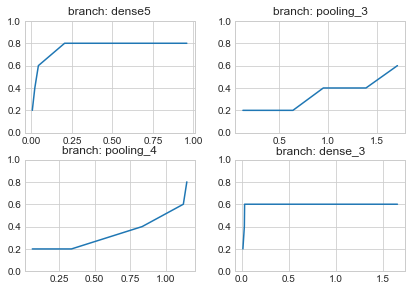

In [22]:
pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
y = KneeGraph(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)

In [23]:
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
def KneeGraphClasses(pred, labels, entropy, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for all classes and outputs
        pred: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
    #graph the accuracy rate vs the entropy threshold.
    #get series of entropy values, series of 
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
#     print(transpose_results)
#     print(transpose_preds)
#     print(transpose_entropy)
#     print(transpose_labels)
    # %matplotlib inline
   
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout(pad=0)
    df =  pd.DataFrame() 
#     print(transpose_entropy)
#     for branch in branches:
#          for class in classes:
#                 for entropy in entropies:
#                     classAccuracy = sum of truth labels /count of truth labels where entropies <= entropy 
    returnData = []
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}: {}".format(i,branchEntropy))
        classEntropy = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
#             print("class {}".format(labelClass))
            for k, entropy in enumerate(branchEntropy):
                # if there are no entries for a label class, this would produce an accuracy of NaN, so instead skip. 
#                 if math.isnan(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])) :
#                     continue
                
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))]
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))]
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where(transpose_labels[i] == labelClass)])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy"])
            df = df.sort_values(by=["entropy"])
            print(df)
            axs[round(int(i/2)), round(i%2)].plot(df["entropy"],df["accuracy"], label="Class: {}".format(labelClass),alpha=0.8)        
        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
        returnData.append(classEntropy)
        
    lines = []
    labels = []
    for ax in fig.axes:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axLine, axLabel = ax.get_legend_handles_labels()
        lines=(axLine)
        labels=(axLabel)
        
    fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
    plt.show()
    returnData = pd.DataFrame(returnData)
    return returnData

branch 0: [0.02117891 0.20513429 0.96025493 0.00565336 0.04327244]
    entropy pred labels  accuracy
3  0.005653  [0]    [0]       1.0
0  0.021179  [0]    [0]       1.0
4  0.043272  [0]    [0]       1.0
1  0.205134  [0]    [0]       1.0
2  0.960255  [0]    [0]       1.0
    entropy pred labels  accuracy
3  0.005653   []     []       NaN
0  0.021179   []     []       NaN
4  0.043272   []     []       NaN
1  0.205134   []     []       NaN
2  0.960255   []     []       NaN
    entropy pred labels  accuracy
3  0.005653   []     []       NaN
0  0.021179   []     []       NaN
4  0.043272   []     []       NaN
1  0.205134   []     []       NaN
2  0.960255   []     []       NaN
    entropy pred labels  accuracy
3  0.005653   []     []       0.0
0  0.021179  [3]    [3]       1.0
4  0.043272  [3]    [3]       1.0
1  0.205134  [3]    [3]       1.0
2  0.960255  [3]    [3]       1.0
    entropy pred labels  accuracy
3  0.005653   []     []       NaN
0  0.021179   []     []       NaN
4  0.043272   [

C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in long_scalars


    entropy pred labels  accuracy
1  0.062741   []     []       NaN
3  0.337705   []     []       NaN
4  0.834291   []     []       NaN
0  1.123505   []     []       NaN
2  1.148021   []     []       NaN
    entropy    pred  labels  accuracy
1  0.062741     [8]     [8]       0.5
3  0.337705     [8]     [8]       0.5
4  0.834291     [8]     [8]       0.5
0  1.123505     [8]     [8]       0.5
2  1.148021  [8, 8]  [8, 8]       1.0
    entropy pred labels  accuracy
1  0.062741   []     []       NaN
3  0.337705   []     []       NaN
4  0.834291   []     []       NaN
0  1.123505   []     []       NaN
2  1.148021   []     []       NaN
branch 3: [0.02854453 0.02574754 1.16669959 1.6566821  0.01030022]
    entropy pred labels  accuracy
4  0.010300   []     []       0.0
1  0.025748   []     []       0.0
0  0.028545   []     []       0.0
2  1.166700   []     []       0.0
3  1.656682  [1]    [0]       0.0
    entropy pred labels  accuracy
4  0.010300   []     []       NaN
1  0.025748   []     []  

<Figure size 432x288 with 0 Axes>

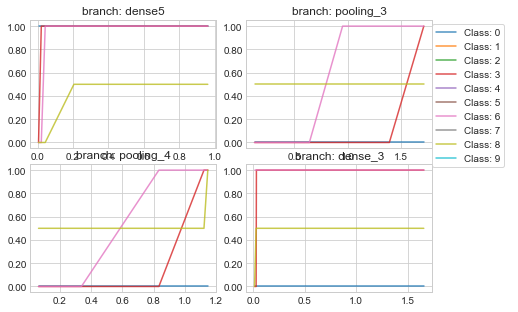

In [24]:
pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289],
           [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482],
           [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988],
           [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247],
           [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
y = KneeGraphClasses(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)

In [25]:
def KneeGraphPredictedClasses(pred, labels, entropy, num_outputs, classes, output_names=[]):
    """ generate a matrix of entropy values for all classes and outputs
        pred: list of all predicted labels
        labels: list of all actual labels. must match pred in size and shape
        classes: list of all classes, for example [0,1,2,3]
        output_names: list of names for each of the outputs. applies names to outputs in the same order as pred and labels.

    """    
    #graph the accuracy rate vs the entropy threshold.
    #get series of entropy values, series of 
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
#     print(transpose_results)
#     print(transpose_preds)
#     print(transpose_entropy)
#     print(transpose_labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
#     print(transpose_entropy)
#     for branch in branches:
#          for class in classes:
#                 for entropy in entropies:
#                     classAccuracy = sum of truth labels /count of truth labels where entropies <= entropy 
    returnData = []
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}: {}".format(i,branchEntropy))
        classEntropy = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
            print("class {}".format(labelClass))
            for k, entropy in enumerate(branchEntropy):
                # if there are no entries for a label class, this would produce an accuracy of NaN, so instead skip. 
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy"])
            df = df.sort_values(by=["entropy"])
            print(df)
            axs[round(int(i/2)), round(i%2)].plot(df["entropy"],df["accuracy"], label="Class: {}".format(labelClass),alpha=0.8)        
        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    for ax in fig.axes:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axLine, axLabel = ax.get_legend_handles_labels()
        lines=(axLine)
        labels=(axLabel)
        
    fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)

#     plt.show()
    
    #######
    output = np.empty([0])
    print(output)
    for i, branch in enumerate(y):
        branchOutput = []
        for j, classList in branch.items():
            entropy =np.empty([])
            acc =np.empty([])
            for k in classList:
                entropy = np.append(entropy,k["entropy"])
                acc = np.append(acc, k["accuracy"])
            df["branch{}_class{}_entropy".format(i,j)] = entropy
            df["branch{}_class{}_accuracy".format(i,j)] = acc.astype(float)
    print("-------")
#     print(df)
    df.to_csv("graph_output.csv")
    return returnData

branch 0: [0.02117891 0.20513429 0.96025493 0.00565336 0.04327244]
class 0
    entropy pred labels  accuracy
3  0.005653  [0]    [0]       1.0
0  0.021179  [0]    [0]       1.0
4  0.043272  [0]    [0]       1.0
1  0.205134  [0]    [0]       1.0
2  0.960255  [0]    [0]       1.0
class 1
    entropy pred labels  accuracy
3  0.005653   []     []       NaN
0  0.021179   []     []       NaN
4  0.043272   []     []       NaN
1  0.205134   []     []       NaN
2  0.960255  [1]    [8]       NaN
class 2
Empty DataFrame
Columns: [entropy, pred, labels, accuracy]
Index: []
class 3
    entropy pred labels  accuracy
3  0.005653   []     []       0.0
0  0.021179  [3]    [3]       1.0
4  0.043272  [3]    [3]       1.0
1  0.205134  [3]    [3]       1.0
2  0.960255  [3]    [3]       1.0
class 4
Empty DataFrame
Columns: [entropy, pred, labels, accuracy]
Index: []
class 5
Empty DataFrame
Columns: [entropy, pred, labels, accuracy]
Index: []
class 6
    entropy pred labels  accuracy
3  0.005653   []     [] 

C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in long_scalars


Empty DataFrame
Columns: [entropy, pred, labels, accuracy]
Index: []
class 8
    entropy       pred     labels  accuracy
1  0.062741        [8]        [8]       0.5
3  0.337705     [8, 8]     [8, 0]       0.5
4  0.834291     [8, 8]     [8, 0]       0.5
0  1.123505     [8, 8]     [8, 0]       0.5
2  1.148021  [8, 8, 8]  [8, 8, 0]       1.0
class 9
Empty DataFrame
Columns: [entropy, pred, labels, accuracy]
Index: []
branch 3: [0.02854453 0.02574754 1.16669959 1.6566821  0.01030022]
class 0
Empty DataFrame
Columns: [entropy, pred, labels, accuracy]
Index: []
class 1
    entropy    pred  labels  accuracy
4  0.010300      []      []       NaN
1  0.025748      []      []       NaN
0  0.028545      []      []       NaN
2  1.166700     [1]     [8]       NaN
3  1.656682  [1, 1]  [8, 0]       NaN
class 2
Empty DataFrame
Columns: [entropy, pred, labels, accuracy]
Index: []
class 3
    entropy pred labels  accuracy
4  0.010300   []     []       0.0
1  0.025748   []     []       0.0
0  0.028545  [3

AttributeError: 'int' object has no attribute 'items'

<Figure size 432x288 with 0 Axes>

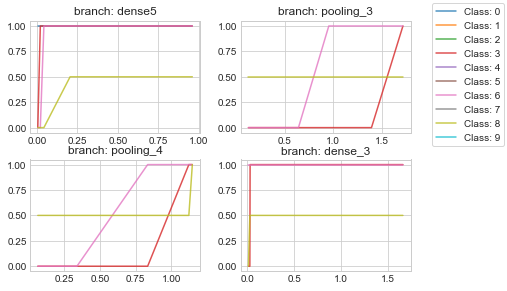

In [26]:
# pred = [[0],[0],[3],[3]]
pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
# entropy = [[0.02117890713197057], [1.7145111565508644], [1.123504928401738], [0.02854453329516289]]
entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
# labels = [[0],[1],[2],[3]]

y = KneeGraphPredictedClasses(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)

In [ ]:
# print(type(y))

df = pd.DataFrame(columns=["entropy"],dtype="float64")
for i, branch in enumerate(y):
#     print(output)
#     output =np.append(output,[-1]) 
#     print(type(branch))
#     print("branch {}".format(i))
    branchOutput = []
    for j, classList in branch.items():
        
#         print("class {}".format(j))
        entropy =np.empty([0,len(classList)])
        eList = []
        aList = []
#         print(entropy.shape)
#         acc =np.empty([])
#         print(type(classList))
#         classDf = pd.DataFrame(classList).values
#         print(type(classDf))
#         print(class)
        for k in classList:
#             print(k["entropy"])
            eList.append(k["entropy"])
            aList.append(k["accuracy"])
#             print(eList)
#             acc = np.append(acc, k["accuracy"])

#             print(k["entropy"])
#         print(entropy.shape)
#         e= pd.DataFrame({"entropy".format(i,j):eList,"branch{}_class{}_accuracy".format(i,j):aList})
#         a= pd.DataFrame({"branch{}_class{}_accuracy".format(i,j):aList})
#         print(e)
#         df = pd.concat([df,e],axis=1)
        e = pd.DataFrame({"entropy":eList,"branch{}_class{}_accuracy".format(i,j):aList})
#         print(e)
#         df = pd.concat([df,e])
#         df = df.join(e.set_index('entropy'), on='entropy')
        df = pd.merge(df,e,on="entropy",how="outer")
#         print(df)
#         df = pd.concat([df,a],axis=1)
#         df = pd.concat([df,pd.DataFrame({"branch{}_class{}_accuracy".format(i,j):acc.astype(float)})])
#         df = pd.concat(pd.DataFrame({"branch{}_class{}_entropy".format(i,j):entropy}))
#         df.insert(0,"branch{}_class{}_entropy".format(i,j),entropy)
#         df.insert(0,"branch{}_class{}_accuracy".format(i,j),acc.astype(float))
#         df["branch{}_class{}_entropy".format(i,j)] = entropy
#         df["branch{}_class{}_accuracy".format(i,j)] = acc.astype(float)
#         print(acc)
#         output = np.concatenate(output,entropy)
        
#         output = np.append(output,[-10])
#         output = np.append(output, [acc])
#         df["{}_entropy".format(j)] = [np.array(entropy).transpose()]
#         df["{}_accuracy".format(j)] = [np.array(acc).transpose()]
    
#             for l in k.items():
#                 print(l)
# df["b"] = [1]
print("-------")
# print(type(df))
print(df)


In [27]:
df.to_csv("graph_output_test.csv")


NameError: name 'df' is not defined

In [28]:
df = pd.DataFrame()
# print(y)
for i, dic in enumerate(y):
#     print(type(dic))
#     print(dic)
#     df = pd.DataFrame.from_dict(dic, orient='index')
    print(i)
    print(dic[0])
#     df["{}_entropy".format(i)] = 

0


TypeError: 'int' object is not subscriptable

In [29]:
df1 = pd.DataFrame([['a', 1], ['b', 2]],columns=['entropy', 'number'])
print(df1)

  entropy  number
0       a       1
1       b       2


In [30]:

entropy= [1,2,3]
acc = [4,5,6]
e = pd.DataFrame({"entropy":entropy,"acc":acc})
df1 = pd.concat([df1,e])
print(df1)

   acc entropy  number
0  NaN       a     1.0
1  NaN       b     2.0
0  4.0       1     NaN
1  5.0       2     NaN
2  6.0       3     NaN


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [21]:
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def kneeTest(pred, labels, entropy, num_outputs, classes, output_names=[]):
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
#     print(transpose_entropy)
#     for branch in branches:
#          for class in classes:
#                 for entropy in entropies:
#                     classAccuracy = sum of truth labels /count of truth labels where entropies <= entropy 
    returnData = []
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}".format(i))
        classEntropy = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
#             print("class {}".format(labelClass),end="\r")
            for k, entropy in enumerate(branchEntropy):
                # if there are no entries for a label class, this would produce an accuracy of NaN, so instead skip. 
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy"])
            df = df.sort_values(by=["entropy"])
#             print(df)
            axs[round(int(i/2)), round(i%2)].plot(df["entropy"],df["accuracy"], label="Class: {}".format(labelClass),alpha=0.8)        
            axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])

        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    for ax in fig.axes:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axLine, axLabel = ax.get_legend_handles_labels()
        lines=(axLine)
        labels=(axLabel)
        
        # Set common labels
    fig.text(0.5, 0.01, 'Confidence Score', ha='center', va='center')
    fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
    fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)

#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

branch 0
branch 1


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in long_scalars


branch 2
branch 3


<Figure size 432x288 with 0 Axes>

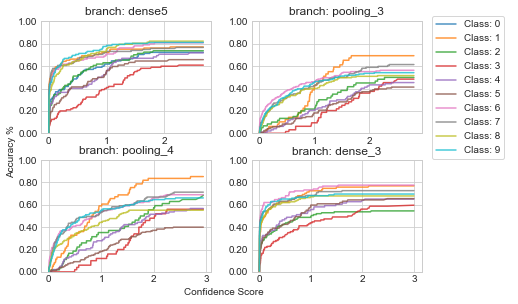

In [23]:
# pred = [[0],[3],[3],[3]]
# # pred = [[3, 3, 3, 3], [8, 8, 8, 8], [1, 1, 8, 1], [0, 8, 8, 1], [6, 6, 6, 6]]
# entropy = [[0.02117890713197057], [1.7145111565508644], [1.123504928401738], [0.02854453329516289]]
# # entropy = [[0.02117890713197057, 1.7145111565508644, 1.123504928401738, 0.02854453329516289], [0.2051342868918917, 0.12891920859567874, 0.06274062780065608, 0.02574753698232482], [0.9602549250481593, 0.6424450601952321, 1.148021184171209, 1.1666995927769988], [0.005653360056361332, 1.391790668156026, 0.33770517085116436, 1.6566820996289247], [0.04327244093902029, 0.9537953160858115, 0.834290747567063, 0.010300220967992246]]
# # labels = [[3, 3, 3, 3], [8, 8, 8, 8], [8, 8, 8, 8], [0, 0, 0, 0], [6, 6, 6, 6]]
# labels = [[0],[1],[2],[3]]
import csv

with open('results/labels.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    pred = list(reader)
with open('results/predClasses.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    labels = list(reader)
with open('results/predEntropy.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    entropy = list(reader)

y = kneeTest(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)

branch 0
branch 1
branch 2


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in long_scalars


branch 3


<Figure size 432x288 with 0 Axes>

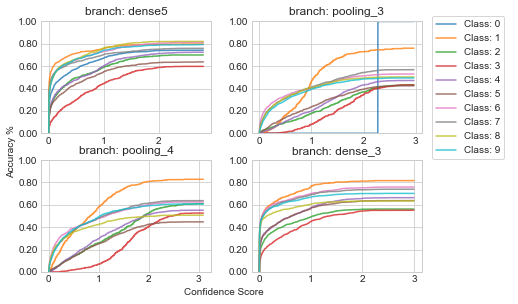

In [19]:
import csv

with open('results/labels_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    pred = list(reader)
with open('results/predClasses_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    labels = list(reader)
with open('results/predEntropy_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    entropy = list(reader)

y = kneeTest(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])
# print(y)

In [134]:
print(type(y))
print(len(y[0][0]))
df = pd.DataFrame()
for i, branch in enumerate(y):
    branchOutput = []
    for j, classList in branch.items():
        entropy =[]
        acc =[]
        for k in classList:
            entropy.append(k["entropy"])
            if (math.isnan(k["accuracy"])):
                acc.append(0)
            else:
                acc.append(k["accuracy"])
        df["branch{}_class_{}_entropy".format(i,j)] = entropy
        df["branch{}_class_{}_accuracy".format(i,j)] = acc
df.to_csv("graph_output.csv", sep=',', mode='w',index=False)        
print("----------")
print(df.shape)
results= []
branches = 4
classes = 10
for column in (df.columns):
    if "accuracy" in column:
        print("{}:".format(column), end="")
        print(" {}, at pos: {}, ".format(df[column].max(),df.iloc[:,df.columns.get_loc(column)].idxmax()),end ="")
        if df[column].max() > 1:
            print("!!!!")
        print("{}: {} ".format(df.iloc[:,df.columns.get_loc(column)-1].name, df.iloc[:,df.columns.get_loc(column)-1][df.iloc[:,df.columns.get_loc(column)].idxmax()] ))
        results.append(df[column].max())
results = np.array(results)
results = np.reshape(results, (branches,classes))

results_df = pd.DataFrame(results)
print(results_df.T)


<class 'list'>
1001
----------
(1001, 80)
branch0_class_0_accuracy: 0.7238095238095238, at pos: 21, branch0_class_0_entropy: 1.760966220831253 
branch0_class_1_accuracy: 0.7722772277227723, at pos: 88, branch0_class_1_entropy: 2.499151710046589 
branch0_class_2_accuracy: 0.7380952380952381, at pos: 63, branch0_class_2_entropy: 1.8302547025691573 
branch0_class_3_accuracy: 0.6095238095238096, at pos: 88, branch0_class_3_entropy: 2.499151710046589 
branch0_class_4_accuracy: 0.7195121951219512, at pos: 88, branch0_class_4_entropy: 2.499151710046589 
branch0_class_5_accuracy: 0.6585365853658537, at pos: 88, branch0_class_5_entropy: 2.499151710046589 
branch0_class_6_accuracy: 0.8090909090909091, at pos: 63, branch0_class_6_entropy: 1.8302547025691573 
branch0_class_7_accuracy: 0.7678571428571429, at pos: 88, branch0_class_7_entropy: 2.499151710046589 
branch0_class_8_accuracy: 0.8240740740740741, at pos: 21, branch0_class_8_entropy: 1.760966220831253 
branch0_class_9_accuracy: 0.8125, at p

In [18]:
# This is the best entropy accuracy for each class,
# now to determine when to trust or pass, what entropy has the best acc for answered items?
# of all items seen at this entropy value, what is the accuracy score?
import numpy as np
import pandas as pd
import math
from matplotlib.ticker import FormatStrFormatter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

def exitAccuracy(results, labels, classes=[]):
    """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
    """
    classAcc = {}
    for i, labelClass in enumerate(classes):
        classAcc[labelClass] = results[np.where(labels==labelClass)].sum()/len(labels[np.where(labels == labelClass)])
    return classAcc

def findMainExitAccuracies(pred, labels, num_outputs, classes=[], output_names=[],graph=True):
        """ find the accuracy scores of the main network exit for each class
            if classes is empty, return the average accuracy for all labels
        """
        results = np.equal(pred, labels)
        pred = np.array(pred)
        labels = np.array(labels)
        classCount = {}
        labelClasses=classes
        transpose_results = np.transpose(results) #truths
        transpose_preds = np.transpose(pred) #per exit rather then per input
        transpose_labels = np.transpose(labels)
        # %matplotlib inline
        if graph==True:
            plt.style.use('seaborn-whitegrid')
            fig = plt.figure()
            fig.tight_layout()
        df =  pd.DataFrame() 
        classAcc= exitAccuracy(transpose_results[0],transpose_labels[0],labelClasses)
        if graph==True:
            for i in classAcc:
                plt.bar(labelClasses[i], classAcc[labelClasses[i]], label="Class: {}".format(labelClasses[i]),alpha=0.8)        
        print(classAcc)
    #     print(sum(classAcc.values())/len(classAcc.values()))
        if graph==True:
            plt.title("Label Class Accuracy")
            plt.ylabel("Accuracy %")
            plt.xlabel("Label Class #")
            plt.show()
        return classAcc


def findConfidencePoint(pred, labels, entropy, num_outputs, classes, output_names=[]):
    #get series of entropy values, series of 
#     print(pred)
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    import matplotlib.pyplot as plt
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure()
    series=[]
    fig, axs = plt.subplots(2, 2)
    fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}".format(i))
        classEntropy = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
#             print("class {}".format(labelClass),end="\r")
            for k, entropy in enumerate(branchEntropy):
                # if there are no entries for a label class, this would produce an accuracy of NaN, so instead skip. 
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                seriesEntropy["count"] = len(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy","count"])
            df = df.sort_values(by=["count"])
#             print(df["accuracy"].size)
            #find max of count where accuracy >= mainbranch acc
            
            axs[round(int(i/2)), round(i%2)].plot(df["count"],df["accuracy"], label="Class: {}".format(labelClass),alpha=0.8)        
            axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])

        if len(output_names) >= i:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
        else:
            axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    for ax in fig.axes:
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        axLine, axLabel = ax.get_legend_handles_labels()
        lines=(axLine)
        labels=(axLabel)
    
    # Set common labels
    fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
    fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')

    fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)

#     print(output)
    
#     print(df)
#     df.to_csv("graph_output.csv")
    return returnData

branch 0


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:92: RuntimeWarning: invalid value encountered in long_scalars


branch 1
branch 2
branch 3


<Figure size 720x720 with 0 Axes>

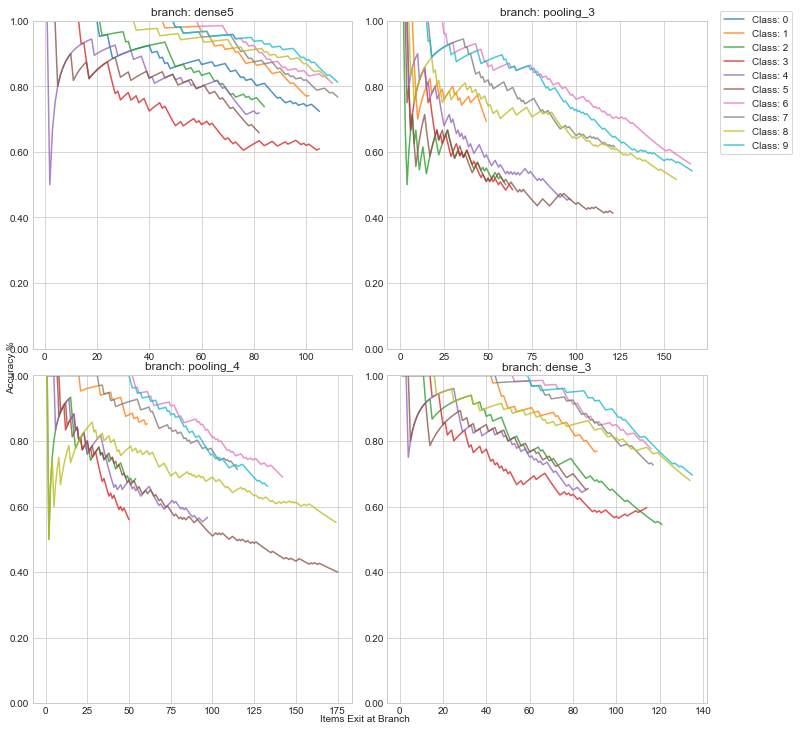

In [16]:
import csv

with open('results/labels.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    pred = list(reader)
with open('results/predClasses.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    labels = list(reader)
with open('results/predEntropy.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    entropy = list(reader)

y = findConfidencePoint(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])


# print(y)


#### we want to find the entropy point where the accuracy % is => to the accuracy of the original exit, and the number of answered items is maximum

{0: 0.7238095238095238, 1: 0.7722772277227723, 2: 0.7380952380952381, 3: 0.6095238095238096, 4: 0.7195121951219512, 5: 0.6585365853658537, 6: 0.8090909090909091, 7: 0.7678571428571429, 8: 0.8240740740740741, 9: 0.8125}


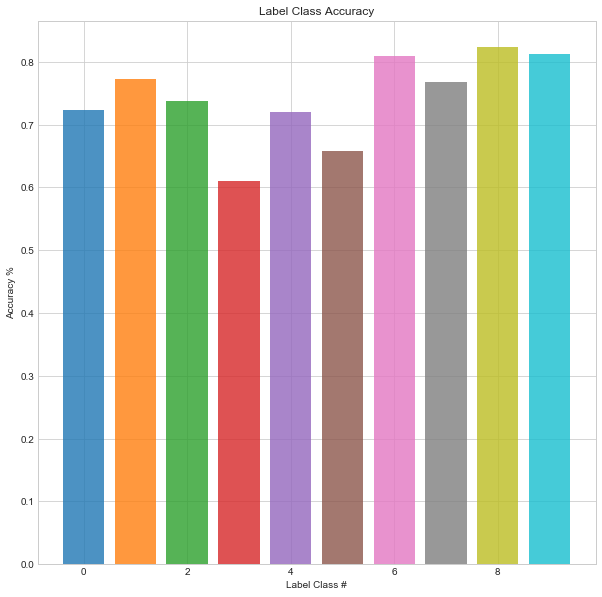

In [19]:
y = findMainExitAccuracies(pred, labels, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])

branch 0


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in long_scalars


branch 1
branch 2
branch 3


<Figure size 432x288 with 0 Axes>

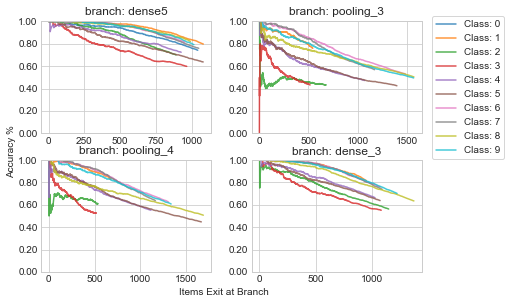

In [9]:
import csv

with open('results/labels_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    pred = list(reader)
with open('results/predClasses_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    labels = list(reader)
with open('results/predEntropy_full.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    entropy = list(reader)

y = findConfidencePoint(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"])

# print(y)


In [79]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def find_nearest(array, value):
    """returns the index of the element of array that is closest to value
        Nan is treated as 0 for the purpose of finding closest value.
    """
    if isinstance(array, pd.Series):
        indexes = find_neighbours(value,array)
#         print(indexes)
        return indexes
    else:
        array = np.asarray(array)
        idx = np.nanargmin(np.abs(array - value))    

    print("nearest value to {} is {} at {}".format(value, array[idx], idx))
    
    return idx

def find_neighbours(df, value, colname=""):
    """ find the closest matches to a value in a dataframe, if there are multiple matches, use the match that has the highest 
        count value, aka the most number of counts.
    """
    
    if isinstance(df, pd.DataFrame):
        if (df[colname].notna().sum()) <= 0:
            # no valid values were found, return 0 
            print("no Valid values were found for df")
            return 0
        exactmatch = df[df[colname] == value]
        if not exactmatch.empty:
            return exactmatch["count"].argmax()
        else:
#             pd.set_option('display.max_rows', None) 
#             print(df)
#             pd.set_option('display.max_rows', 100) 
            try:            
                lowerneighbour_ind = df[df[colname] < value][colname].idxmax()
            except ValueError:
                lowerneighbour_ind = 0
            try:
                upperneighbour_ind = df[df[colname] > value][colname].idxmin()
            except ValueError:
                upperneighbour_ind = 0
                
#             print("lowerneighbour_ind {}".format(lowerneighbour_ind))
#             print("upperneighbour_ind {}".format(upperneighbour_ind))
            
            neighbours = df.iloc[[lowerneighbour_ind,upperneighbour_ind]]
#             print(neighbours)
#             print(neighbours["count"].idxmax())

#             neighbours = neighbours["accuracy"].sub(value).abs().idxmin()
#             print(neighbours)
            return neighbours["count"].idxmax()
    else:
        print("input is not a Dataframe, {}".format(type(df)))
        return None
    
    
        

    
def findThreshold(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0,graph=False):
    """    Find and Mark the threshold points for each class.
        mainbranchNum: the position in the pred array of the main exit, defaults to the first exit.
    """    
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    
    ##find the main exit accuracy levels to compare the branches to.
    ##assume the first branch is the main branch to match too
    
    mainAcc = findMainExitAccuracies(pred, labels, num_outputs, classes, output_names, graph=False)
    thresholdPoints={}
    colors = cm.rainbow(np.linspace(0, 1, len(labelClasses)))
    for i, branchEntropy in enumerate(transpose_entropy):
        print("branch {}".format(i))
        classEntropy = {}
        thresholdPoints[output_names[i]] = {}
        for j, labelClass in enumerate(labelClasses):
            classEntropy[labelClass] = []
            for k, entropy in enumerate(branchEntropy):
#                 print("sum is: {} len is: {}, combined is: {}".format(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum(), len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))]),transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((transpose_labels[i] == labelClass))])))
                if len(transpose_preds[i][np.where((transpose_preds[i] == labelClass))])==0 :
#                     print("skip!")
                    continue
                seriesEntropy = {}
                seriesEntropy["entropy"] = entropy
                seriesEntropy["pred"] = transpose_preds[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["labels"] = transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_preds[i] == labelClass))] # select all where labelClass is PREDICTED
                seriesEntropy["accuracy"] = transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))].sum()/len(transpose_labels[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                seriesEntropy["count"] = len(transpose_results[i][np.where((branchEntropy <= entropy) & (transpose_labels[i] == labelClass))])
                classEntropy[labelClass].append(seriesEntropy)
            df = pd.DataFrame(classEntropy[labelClass],columns=["entropy","pred","labels","accuracy","count"])
            threshold_idx = find_neighbours(df[["accuracy","count"]],mainAcc[labelClass],"accuracy")
            thresholdPoints[output_names[i]][labelClass] = df.iloc[threshold_idx][["accuracy","count","entropy"]].to_dict()
            maxRowidx = df["count"].idxmax()
#             print("nearest value to {} is {} at {} with {} counts ".format(mainAcc[labelClass],df["accuracy"][threshold_idx],threshold_idx, df["count"][threshold_idx]))
#             print("The max count value is {} with {} counts".format(float(df.iloc[maxRowidx]["accuracy"]), int(df.iloc[maxRowidx]["count"])))
            if graph:
                axs[round(int(i/2)), round(i%2)].plot(df.iloc[threshold_idx]["count"],df.iloc[threshold_idx]["accuracy"],marker='v', markersize=5, color=colors[j])
                df = df.sort_values(by=["count"])
                axs[round(int(i/2)), round(i%2)].plot(df["count"],df["accuracy"], label="Class: {}".format(labelClass), color=colors[j], alpha=0.8)        

                axs[round(int(i/2)), round(i%2)].plot()

                axs[round(int(i/2)), round(i%2)].set_ylim([0, 1])
        if graph:
            if len(output_names) >= i:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(output_names[i]))
            else:
                axs[round(int(i/2)), round(i%2)].title.set_text("branch: {}".format(i))
            
        returnData.append(classEntropy)
    lines = []
    labels = []
    if graph:
        for ax in fig.axes:
            ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
            axLine, axLabel = ax.get_legend_handles_labels()
            lines=(axLine)
            labels=(axLabel)

        # Set common labels
        fig.text(0.5, 0.01, 'Items Exit at Branch', ha='center', va='center')
        fig.text(0.01, 0.5, 'Accuracy %', ha='center', va='center', rotation='vertical')
        fig.legend(lines, labels,bbox_to_anchor=(1., 1), loc=2,borderaxespad=0.,frameon=True)
#     df.to_csv("graph_output.csv")
    return thresholdPoints


In [81]:
import csv
plt.rcParams["figure.figsize"] = (10,10)
with open('results/labels.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    pred = list(reader)
with open('results/predClasses.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    labels = list(reader)
with open('results/predEntropy.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    entropy = list(reader)

thresholdpoints = findThreshold(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"],graph=False)

print("Threshold Points:")
print(thresholdpoints)

{0: 0.7238095238095238, 1: 0.7722772277227723, 2: 0.7380952380952381, 3: 0.6095238095238096, 4: 0.7195121951219512, 5: 0.6585365853658537, 6: 0.8090909090909091, 7: 0.7678571428571429, 8: 0.8240740740740741, 9: 0.8125}
branch 0


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in long_scalars


branch 1
no Valid values were found for df
branch 2
no Valid values were found for df
branch 3
no Valid values were found for df
Threshold Points:
{'dense5': {0: {'accuracy': 0.7238095238095238, 'count': 105, 'entropy': 2.499151710046589}, 1: {'accuracy': 0.7722772277227723, 'count': 101, 'entropy': 2.499151710046589}, 2: {'accuracy': 0.7380952380952381, 'count': 84, 'entropy': 2.499151710046589}, 3: {'accuracy': 0.6095238095238096, 'count': 105, 'entropy': 2.499151710046589}, 4: {'accuracy': 0.7195121951219512, 'count': 82, 'entropy': 2.499151710046589}, 5: {'accuracy': 0.6585365853658537, 'count': 82, 'entropy': 2.598053333471273}, 6: {'accuracy': 0.8090909090909091, 'count': 110, 'entropy': 2.598053333471273}, 7: {'accuracy': 0.7678571428571429, 'count': 112, 'entropy': 2.6743912961237584}, 8: {'accuracy': 0.8240740740740741, 'count': 108, 'entropy': 2.499151710046589}, 9: {'accuracy': 0.8125, 'count': 112, 'entropy': 2.499151710046589}}, 'pooling_3': {0: {'accuracy': nan, 'count': 

In [82]:
print(thresholdpoints)
for i in thresholdpoints:
    thresh = pd.DataFrame.from_dict(thresholdpoints[i],orient='index')
    print(i)

    print(thresh)


{'dense5': {0: {'accuracy': 0.7238095238095238, 'count': 105, 'entropy': 2.499151710046589}, 1: {'accuracy': 0.7722772277227723, 'count': 101, 'entropy': 2.499151710046589}, 2: {'accuracy': 0.7380952380952381, 'count': 84, 'entropy': 2.499151710046589}, 3: {'accuracy': 0.6095238095238096, 'count': 105, 'entropy': 2.499151710046589}, 4: {'accuracy': 0.7195121951219512, 'count': 82, 'entropy': 2.499151710046589}, 5: {'accuracy': 0.6585365853658537, 'count': 82, 'entropy': 2.598053333471273}, 6: {'accuracy': 0.8090909090909091, 'count': 110, 'entropy': 2.598053333471273}, 7: {'accuracy': 0.7678571428571429, 'count': 112, 'entropy': 2.6743912961237584}, 8: {'accuracy': 0.8240740740740741, 'count': 108, 'entropy': 2.499151710046589}, 9: {'accuracy': 0.8125, 'count': 112, 'entropy': 2.499151710046589}}, 'pooling_3': {0: {'accuracy': nan, 'count': 0, 'entropy': 1.0}, 1: {'accuracy': 0.7692307692307693, 'count': 26, 'entropy': 1.0}, 2: {'accuracy': 0.7142857142857143, 'count': 7, 'entropy': 0.

In [141]:

def predict(pred, labels, entropy, num_outputs, classes, output_names=[],mainBranchNum=0,graph=False):
    mainBranch = 0 #which exit in the results is the main branch and to be skipped?
    resultsDict = {}
    results = np.equal(pred, labels)
    pred = np.array(pred)
    labels = np.array(labels)
    entropy = np.array(entropy)
    classCount = {}
#     results = pred
    labelClasses=classes
    transpose_results = np.transpose(results) #truths
    transpose_preds = np.transpose(pred) #per exit rather then per input
    transpose_entropy = np.transpose(entropy) #per exit rather then per input
    transpose_labels = np.transpose(labels)
    # %matplotlib inline
    if graph:
        plt.style.use('seaborn-whitegrid')
        fig = plt.figure()
        series=[]
        fig, axs = plt.subplots(2, 2)
        fig.tight_layout()
    df =  pd.DataFrame() 
    returnData = []
    #get the main branch accuracy values
    mAcc = exitAccuracy(transpose_results[0],transpose_labels[0], labelClasses)
    #determine the class thresholds for the branches that are closest to the main branch accuracy values
    thresholdpoints = findThreshold(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], output_names)
    for i in thresholdpoints:
        thresh = pd.DataFrame.from_dict(thresholdpoints[i],orient='index')
#         print(i)

#         print(thresh)
    def classResult():
        classes = 10
        results={}
        for i in range(classes):
            results[i]= {"correct":0,"total":0,"passed":0}
        return results
    BR = {"dense5":classResult(),"pooling_3":classResult(),"pooling_4":classResult(),"dense_3":classResult()}
    
    #iterate through results to see which predictions meet threshold requirements.
    for i, prediction in enumerate(pred):
        print(prediction)
        for j, bResult in enumerate(prediction):
#             if j == mainBranch: ###skip the first branch as it is the main 
#                 continue
                
            if entropy[i][j] <= thresholdpoints[output_names[j]][bResult]["entropy"]:
                print("pred {}(l:{}) at branch {} is accepted, {} <={}".format(bResult,labels[i][j],j,entropy[i][j],thresholdpoints[output_names[j]][bResult]["entropy"]))
                print(BR[output_names[j]][labels[i][j]])
                if bResult == labels[i][j]:
                    BR[output_names[j]][labels[i][j]]["correct"] += 1 
                BR[output_names[j]][labels[i][j]]["total"] += 1 
            else:
                BR[output_names[j]][labels[i][j]]["passed"] += 1 
    print(BR)
    return BR

In [142]:
import csv
plt.rcParams["figure.figsize"] = (10,10)
with open('results/labels.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    pred = list(reader)
with open('results/predClasses.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    labels = list(reader)
with open('results/predEntropy.csv', newline='') as f:
    reader = csv.reader(f,quoting=csv.QUOTE_NONNUMERIC)
    entropy = list(reader)

y = predict(pred, labels, entropy, 4,[0,1,2,3,4,5,6,7,8,9], ["dense5","pooling_3","pooling_4","dense_3"],graph=False)

print("Threshold Points:")
print(y)

{0: 0.7238095238095238, 1: 0.7722772277227723, 2: 0.7380952380952381, 3: 0.6095238095238096, 4: 0.7195121951219512, 5: 0.6585365853658537, 6: 0.8090909090909091, 7: 0.7678571428571429, 8: 0.8240740740740741, 9: 0.8125}
branch 0


C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
C:\Users\GriffithInnovate\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in long_scalars


branch 1
no Valid values were found for df
branch 2
no Valid values were found for df
branch 3
no Valid values were found for df
[0. 1. 2. 3.]
pred 0.0(l:0.0) at branch 0 is accepted, 0.0 <=2.499151710046589
{'correct': 0, 'total': 0, 'passed': 0}
pred 1.0(l:1.0) at branch 1 is accepted, 1.0 <=1.0
{'correct': 0, 'total': 0, 'passed': 0}
[3. 3. 3. 3.]
pred 3.0(l:3.0) at branch 0 is accepted, 0.02117890713197057 <=2.499151710046589
{'correct': 0, 'total': 0, 'passed': 0}
pred 3.0(l:3.0) at branch 2 is accepted, 1.123504928401738 <=2.159195637333551
{'correct': 0, 'total': 0, 'passed': 0}
pred 3.0(l:3.0) at branch 3 is accepted, 0.02854453329516289 <=1.1098781956611319
{'correct': 0, 'total': 0, 'passed': 1}
[8. 8. 8. 8.]
pred 8.0(l:8.0) at branch 0 is accepted, 0.2051342868918917 <=2.499151710046589
{'correct': 0, 'total': 0, 'passed': 0}
pred 8.0(l:8.0) at branch 2 is accepted, 0.06274062780065608 <=0.06274062780065608
{'correct': 0, 'total': 0, 'passed': 0}
pred 8.0(l:8.0) at branch 3 

{'correct': 21, 'total': 30, 'passed': 7}
pred 9.0(l:9.0) at branch 3 is accepted, 0.06909120096923689 <=0.9395060557238266
{'correct': 23, 'total': 31, 'passed': 2}
[0. 0. 0. 0.]
pred 0.0(l:0.0) at branch 0 is accepted, 0.01978987840631664 <=2.499151710046589
{'correct': 17, 'total': 24, 'passed': 0}
pred 0.0(l:2.0) at branch 1 is accepted, 0.19253770030875836 <=1.0
{'correct': 1, 'total': 3, 'passed': 10}
pred 0.0(l:2.0) at branch 2 is accepted, 1.1685896459058778 <=2.0
{'correct': 6, 'total': 8, 'passed': 4}
pred 0.0(l:2.0) at branch 3 is accepted, 1.077622896549376 <=3.0
{'correct': 14, 'total': 26, 'passed': 2}
[3. 3. 3. 3.]
pred 3.0(l:8.0) at branch 0 is accepted, 0.30760111089022585 <=2.499151710046589
{'correct': 30, 'total': 33, 'passed': 0}
pred 3.0(l:8.0) at branch 2 is accepted, 2.1387066751181414 <=2.159195637333551
{'correct': 8, 'total': 23, 'passed': 22}
[1. 1. 1. 1.]
pred 1.0(l:1.0) at branch 0 is accepted, 0.11045372350854607 <=2.499151710046589
{'correct': 16, 'total

pred 0.0(l:0.0) at branch 0 is accepted, 0.7755604919123189 <=2.499151710046589
{'correct': 33, 'total': 45, 'passed': 0}
pred 0.0(l:8.0) at branch 1 is accepted, 0.4485333584222804 <=1.0
{'correct': 5, 'total': 26, 'passed': 45}
pred 0.0(l:8.0) at branch 2 is accepted, 0.06466418118695552 <=2.0
{'correct': 10, 'total': 42, 'passed': 35}
pred 0.0(l:8.0) at branch 3 is accepted, 0.0007243126444492776 <=3.0
{'correct': 33, 'total': 53, 'passed': 9}
[0. 0. 0. 0.]
pred 0.0(l:0.0) at branch 0 is accepted, 0.16473306806601043 <=2.499151710046589
{'correct': 34, 'total': 46, 'passed': 0}
pred 0.0(l:5.0) at branch 3 is accepted, 1.8107682845921396 <=3.0
{'correct': 25, 'total': 34, 'passed': 5}
[2. 2. 2. 2.]
pred 2.0(l:2.0) at branch 0 is accepted, 0.08951403989482333 <=2.499151710046589
{'correct': 31, 'total': 42, 'passed': 0}
pred 2.0(l:2.0) at branch 3 is accepted, 0.0587919796220063 <=0.7895758290752619
{'correct': 25, 'total': 46, 'passed': 10}
[9. 9. 9. 9.]
pred 9.0(l:9.0) at branch 0 i

pred 3.0(l:5.0) at branch 0 is accepted, 1.6074893949492441 <=2.499151710046589
{'correct': 39, 'total': 55, 'passed': 0}
pred 3.0(l:3.0) at branch 1 is accepted, 1.681829408140383 <=1.7002349579583573
{'correct': 5, 'total': 5, 'passed': 31}
pred 3.0(l:5.0) at branch 2 is accepted, 1.2770476659804713 <=2.159195637333551
{'correct': 25, 'total': 69, 'passed': 45}
pred 3.0(l:3.0) at branch 3 is accepted, 1.0216522714982554 <=1.1098781956611319
{'correct': 29, 'total': 48, 'passed': 15}
[5. 5. 5. 5.]
pred 5.0(l:5.0) at branch 0 is accepted, 1.1980961706727649 <=2.598053333471273
{'correct': 39, 'total': 56, 'passed': 0}
pred 5.0(l:2.0) at branch 3 is accepted, 0.3878528092879204 <=3.0
{'correct': 35, 'total': 65, 'passed': 11}
[3. 3. 3. 3.]
pred 3.0(l:3.0) at branch 0 is accepted, 0.6524364628715063 <=2.499151710046589
{'correct': 36, 'total': 57, 'passed': 0}
pred 3.0(l:5.0) at branch 1 is accepted, 1.281855389164769 <=1.7002349579583573
{'correct': 13, 'total': 27, 'passed': 45}
pred 3

pred 7.0(l:7.0) at branch 2 is accepted, 0.9724567425529423 <=2.0
{'correct': 61, 'total': 79, 'passed': 16}
pred 7.0(l:7.0) at branch 3 is accepted, 0.0039052311302969333 <=1.3465596095998393
{'correct': 68, 'total': 87, 'passed': 7}
[2. 2. 2. 2.]
pred 2.0(l:2.0) at branch 0 is accepted, 0.0470073096122271 <=2.499151710046589
{'correct': 52, 'total': 68, 'passed': 0}
pred 2.0(l:4.0) at branch 2 is accepted, 1.514835738587227 <=1.8314373315047252
{'correct': 19, 'total': 42, 'passed': 33}
pred 2.0(l:2.0) at branch 3 is accepted, 0.03243449651770428 <=0.7895758290752619
{'correct': 49, 'total': 87, 'passed': 16}
[0. 0. 0. 0.]
pred 0.0(l:0.0) at branch 0 is accepted, 1.081612785619689 <=2.499151710046589
{'correct': 59, 'total': 85, 'passed': 0}
pred 0.0(l:1.0) at branch 1 is accepted, 0.9754834158551 <=1.0
{'correct': 16, 'total': 16, 'passed': 22}
pred 0.0(l:8.0) at branch 2 is accepted, 1.4307589997565298 <=2.0
{'correct': 22, 'total': 70, 'passed': 67}
pred 0.0(l:1.0) at branch 3 is 

In [143]:
print(y)
for i,branch in enumerate(y):
    print(branch)
    for j, classResult in enumerate(y[branch]):
        print(y[branch][classResult])
        try:
            print("accuracy% {}, answered% {}".format(y[branch][classResult]["correct"]/y[branch][classResult]["total"],y[branch][classResult]["total"]/(y[branch][classResult]["total"]+y[branch][classResult]["passed"])))
        except ZeroDivisionError:
            pass

{'dense5': {0: {'correct': 76, 'total': 105, 'passed': 0}, 1: {'correct': 78, 'total': 101, 'passed': 0}, 2: {'correct': 62, 'total': 84, 'passed': 0}, 3: {'correct': 64, 'total': 105, 'passed': 0}, 4: {'correct': 59, 'total': 82, 'passed': 0}, 5: {'correct': 54, 'total': 81, 'passed': 1}, 6: {'correct': 89, 'total': 109, 'passed': 1}, 7: {'correct': 86, 'total': 111, 'passed': 1}, 8: {'correct': 89, 'total': 108, 'passed': 0}, 9: {'correct': 91, 'total': 112, 'passed': 0}}, 'pooling_3': {0: {'correct': 0, 'total': 0, 'passed': 0}, 1: {'correct': 20, 'total': 22, 'passed': 27}, 2: {'correct': 5, 'total': 15, 'passed': 45}, 3: {'correct': 19, 'total': 19, 'passed': 45}, 4: {'correct': 20, 'total': 26, 'passed': 71}, 5: {'correct': 17, 'total': 47, 'passed': 74}, 6: {'correct': 73, 'total': 91, 'passed': 74}, 7: {'correct': 52, 'total': 67, 'passed': 55}, 8: {'correct': 18, 'total': 49, 'passed': 108}, 9: {'correct': 66, 'total': 90, 'passed': 76}}, 'pooling_4': {0: {'correct': 0, 'total

In [136]:
print(len(pred))

1001
